In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle

In [3]:
data_folder = "/storage/yw18581/data/"
dataset_folder = os.path.join(data_folder, "dataset")

In [4]:
src_folder = "/storage/yw18581/src/leaf_reco/"

In [5]:
saved_models = os.path.join(src_folder, "saved_models")

In [6]:
os.listdir(os.path.join(saved_models, "trained_6positions"))

['Trained_rUNet_pytorch_6positions_dataset_5epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_10epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_15epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_20epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_25epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_30epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_35epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_40epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_45epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_50epochs_0.75coeff_mask.pkl',
 'history_Trained_rUNet_pytorch_50epochs_0.75coef.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_5epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_10epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_15epochs_0.7coeff_mask.pkl',


In [7]:
file = open(os.path.join(saved_models, 
                                   "trained_6positions",
                                   "history_Trained_rUNet_pytorch_50epochs_0.7coef.pkl"),'rb')
history = pickle.load(file)

In [8]:
history

{'train': [47.78302051402904,
  42.747497708709155,
  28.63773091337471,
  0.12814312999102254,
  0.07009140267123089,
  0.04783462913258484,
  0.0328714317055764,
  0.024989144617898598,
  0.02201197348013348,
  0.020263249912575162,
  0.024359650331057817,
  0.020751557254698128,
  0.019031122098331927,
  0.0268172347137739,
  0.024324065905400656,
  0.030401761305121774,
  0.018275728277836203,
  0.015369855238262701,
  0.016165656818042475,
  0.02309318668428912,
  0.013374098960344714,
  0.017926991437518695,
  0.013433000333693431,
  0.026285305895187235,
  0.02216495144427797,
  0.009605692146578804,
  0.011766008937869358,
  0.019081983315926563,
  0.012758024756395672,
  0.012831703697749483,
  0.007894844330385913,
  0.01811700991836713,
  0.005720706326192831,
  0.007878555089485383,
  0.008055178404363149,
  0.022216551947403112,
  0.008247099081792705,
  0.0066391647373233425,
  0.007190393428269696,
  0.02204970965774717,
  0.0032084796058134764,
  0.0025474762989216725,


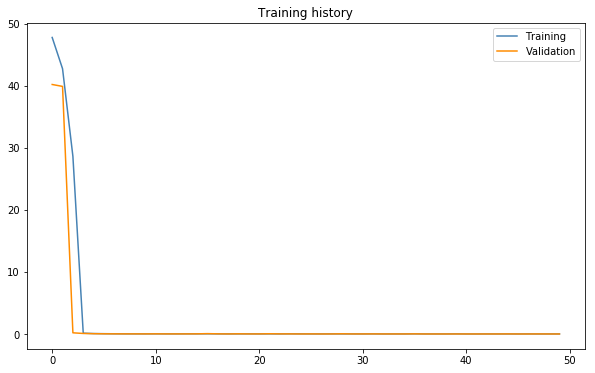

In [9]:
plt.figure(figsize=(10,6))
plt.title("Training history")
plt.plot(history['epochs'], history['train'], c='steelblue', label='Training', )
plt.plot(history['epochs'], history['val'], c='darkorange', label='Validation')
plt.ylim=(0,50)
plt.ylim = (0,30)
plt.legend(loc='upper right')

In [10]:
import sys
sys.path.append('../')
from sklearn.metrics import mean_squared_error

In [11]:
distances =[2,4,10,20,25,35]


In [12]:
from setenv import add_folders

In [13]:
add_folders(key="deepthought")

In [14]:
from utility_functions import define_dataset, training_phase_rUNet, inference_phase_rUNet, exclude_dist, inference_phase_rUNet_plot_notebook

In [15]:
from cUNet_pytorch_pooling import cUNet

In [16]:
import torch

In [17]:
excluded = exclude_dist(dist_list=distances, root_folder=dataset_folder)

In [18]:
excluded

['10x10_2mm_second_clean',
 '10x10_2mm_third_clean',
 '10x10_2mm_first_clean',
 '10x10_2mm_first',
 '10x10_2mm_second',
 '10x10_2mm_third',
 '10x10_4mm_second_clean',
 '10x10_4mm_third_clean',
 '10x10_4mm_first_clean',
 '10x10_4mm_first',
 '10x10_4mm_second',
 '10x10_4mm_third',
 '10x10_10mm_second_clean',
 '10x10_10mm_third_clean',
 '10x10_10mm_first_clean',
 '10x10_10mm_first',
 '10x10_10mm_second',
 '10x10_10mm_third',
 '10x10_20mm_second_clean',
 '10x10_20mm_third_clean',
 '10x10_20mm_first_clean',
 '10x10_20mm_first',
 '10x10_20mm_second',
 '10x10_20mm_third',
 '10x10_25mm_second_clean',
 '10x10_25mm_third_clean',
 '10x10_25mm_first_clean',
 '10x10_25mm_first',
 '10x10_25mm_second',
 '10x10_25mm_third',
 '10x10_35mm_second_clean',
 '10x10_35mm_third_clean',
 '10x10_35mm_first_clean',
 '10x10_35mm_first',
 '10x10_35mm_second',
 '10x10_35mm_third']

In [19]:
data_loaders, data_lengths= define_dataset(dataset_folder, batch_size=16, excluded_list=excluded, alldata=True)

In [20]:
data_lengths

3532

In [21]:
fname = 'Trained_rUNet_pytorch_6positions_dataset_50epochs_0.7coeff_mask.pkl'

In [22]:
model= cUNet(out_size=1)
model_pred = torch.load(os.path.join(saved_models, "trained_6positions",fname))['model_state_dict'];
model.load_state_dict(model_pred)
y_true, y_pred = inference_phase_rUNet(model, data_loaders, data_lengths, batch_size=16,
                                               notebook=True, test=False)

In [23]:
y_true

array([15, 15, 15, ...,  3,  3,  3])

In [24]:
y_pred

array([15.206171 , 15.34209  , 15.248807 , ...,  2.8465466,  3.0842988,
        3.0697794], dtype=float32)

In [25]:
np.savez_compressed("predictions_50epochs_6positions_training_test_on_4_070.npz",
                   true=y_true, pred=y_pred)

In [26]:
mean_squared_error(y_true, y_pred)

0.10345094621680212

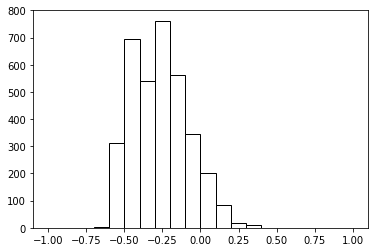

In [47]:
plt.hist(y_true-y_pred, bins=20, range=[-1,1], edgecolor='k',color='white')
plt.show()

In [28]:
def idx_mse(dist, true_arr = y_true, preds_arr = y_pred):
    idx = np.where(true_arr==dist)[0]
    mse = mean_squared_error(true_arr[idx], preds_arr[idx])
    print(dist, mse)
    return idx, mse 

In [29]:
dists = [1, 3, 15, 30]

In [30]:
errors = [idx_mse(i)[1] for i in dists]

1 0.2286817363045653
3 0.014231624406264064
15 0.0475158641323469
30 0.11663354459834711


In [31]:
idxs = [idx_mse(i)[0] for i in dists]

1 0.2286817363045653
3 0.014231624406264064
15 0.0475158641323469
30 0.11663354459834711


In [32]:
y_1mm_true = y_true[idxs[0]]
y_1mm_pred = y_pred[idxs[0]]

In [59]:
import numpy as np
from scipy.stats import norm

def plot_histo(preds, true, xmin, xmax, nbins_fit, nbins_hist=8):
    data = preds-true
    mean,std=norm.fit(data)

    plt.hist(data, bins=nbins_hist, density=True, facecolor='white',edgecolor ="k",  alpha=1, label="data")
    #xmin, xmax = plt.xlim()
    x = np.linspace(xmin,xmax, nbins_fit)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y, c='r', linestyle='-.', label='gaussian fit')
    plt.xlabel('(predicted-true) leaf position [mm]')
    plt.ylabel('Frequence')
    plt.title(r'$\mathrm{Resolution\ histogram:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, std))
    plt.legend(loc='upper right')
    return



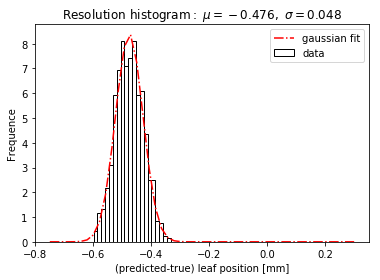

In [68]:
plot_histo(y_1mm_true, y_1mm_pred, xmin=-0.75, xmax=0.3, nbins_fit=50, nbins_hist=20)

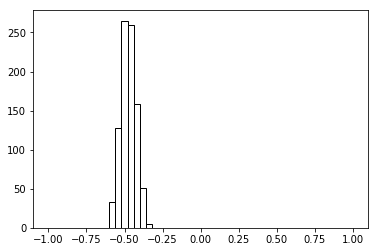

In [52]:
plt.hist(y_1mm_true-y_1mm_pred, bins=50, range=[-1,1], edgecolor='k',color='white')

plt.show()

In [34]:
y_3mm_true = y_true[idxs[1]]
y_3mm_pred = y_pred[idxs[1]]

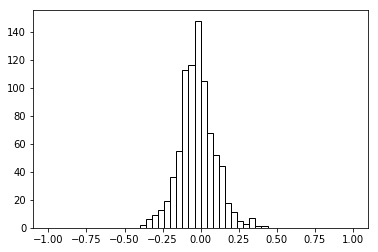

In [53]:
plt.hist(y_3mm_true-y_3mm_pred, bins=50, range=[-1,1], edgecolor='k',color='white')

plt.show()

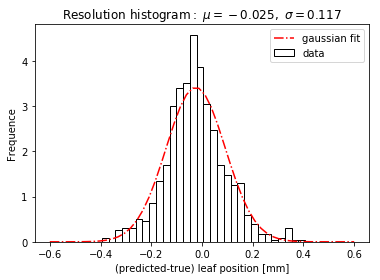

In [71]:
plot_histo(y_3mm_true, y_3mm_pred, xmin=-0.6, xmax=0.6, nbins_fit=50, nbins_hist=30)

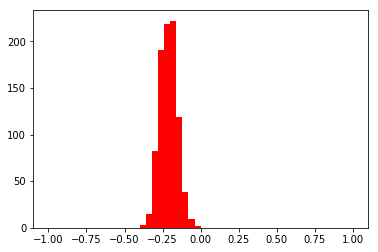

In [58]:
y_15mm_true = y_true[idxs[2]]
y_15mm_pred = y_pred[idxs[2]]

plt.figure()
plt.hist(y_15mm_true-y_15mm_pred, bins=50, range=[-1,1],facecolor='red')

plt.show()


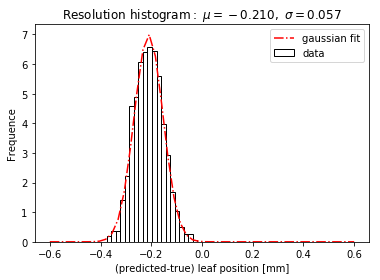

In [73]:
plot_histo(y_15mm_true, y_15mm_pred, xmin=-0.6, xmax=0.6, nbins_fit=50, nbins_hist=20)

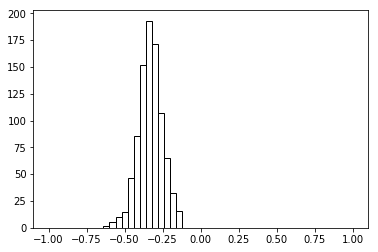

In [55]:
y_30mm_true = y_true[idxs[3]]
y_30mm_pred = y_pred[idxs[3]]

plt.hist(y_30mm_true-y_30mm_pred, bins=50, range=[-1,1], edgecolor='k',color='white')
plt.show()

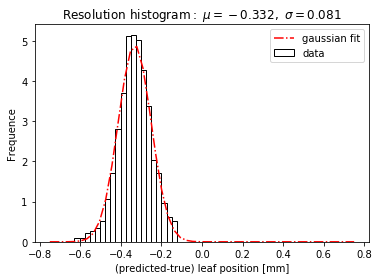

In [76]:
plot_histo(y_30mm_true, y_30mm_pred, xmin=-0.75, xmax=0.75, nbins_fit=50, nbins_hist=20)

In [38]:
np.std(y_true-y_pred)

0.18194982243220073

In [39]:
np.std(y_1mm_true-y_1mm_pred)

0.047504894768066144

In [40]:
np.std(y_3mm_true-y_3mm_pred)

0.11668455088446954

In [41]:
np.std(y_15mm_true-y_15mm_pred)

0.057008772835271254

In [42]:
np.std(y_30mm_true-y_30mm_pred)

0.08137059372873023